<a href="https://colab.research.google.com/github/marixko/machine_learning_IXLAPIS/blob/master/Machine_Learning_Hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This material was created by:


*   Erik Vinicius de Lima (Ph.D. student, IAG-USP)
*   Lilianne Nakazono - lilianne.nakazono@usp.br (Ph.D. candidate, IAG-USP)
*   Maria Luisa Buzzo - maria.buzzo@usp.br (M.Sc. student, IAG-USP)



--- 

**HOW TO GET THIS NOTEBOOK:**



First of all, go to the machine_learning_IXLAPIS repository on GitHub (https://github.com/marixko/machine_learning_IXLAPIS)

- Download the .ipynb file;
- In your terminal, go to the directory where the .ipynb is;
- Type jupyter-notebook;
- Inside jupyter, click the .ipynb file and you will be here with us (:

OR

- Open Google Colab: https://colab.research.google.com/
- Go to File > Open Notebook
- Select the GITHUB tab
- Enter the link: https://github.com/marixko/machine_learning_IXLAPIS.git
- It will show you the .ipynb file, click the "Open notebook in a new tab" icon

OR

- Click in the .ipynb file listed on https://github.com/marixko/machine_learning_IXLAPIS
- Click in "Open in Colab" button


**SOME TRICKS:**

To run the code in jupyter or Google Colab:
- to run a cell and stay in the same cell: ctrl+enter
- to run a cell and go to the next one: shift+center - this is what I will be using.
- to create new cells: 
  - jupyter: b+b
  - Google Colab: ctrl+m b

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# Descriptive Analyses

The ultimate goal of this hands-on session is to learn how to read, visualize and understand the data and the magics of seaborn and scikit-learn. Hold on to that thought and let's do this! 

## Reading data

We will use data containing information of house pricing of California district from a 1990 census. The information are:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

In [0]:
# Let's read the dataset:

california_housing = pd.read_table("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
# ascii use delim_whitespace=True instead of sep


#### Checking data

In [0]:
# Checking statistics of all columns
california_housing.describe()

# If you want to check the name of the columns:
# list(california_housing)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


it is essential to understand the data.
 - Counts: missing bands;
 - mean: if there are wrong values (due to observations or human error), very sensitive to outliers;
 - std: if it is too high, it is a proxy for problems... 
 - min: if there are negative values where it shouldn't have.

 Allows to check, in general, if there is anything wrong with the data.

In [0]:
california_housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


In [0]:
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


## Statistics


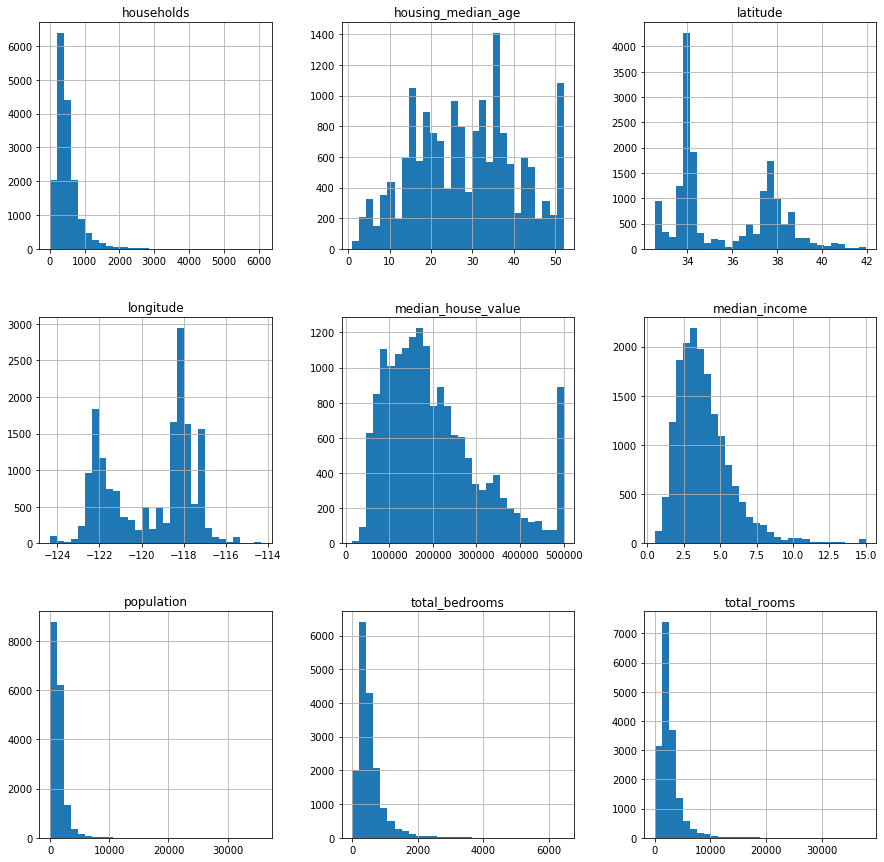

In [0]:
california_housing.hist(figsize=(15,15), bins=30)
plt.show()

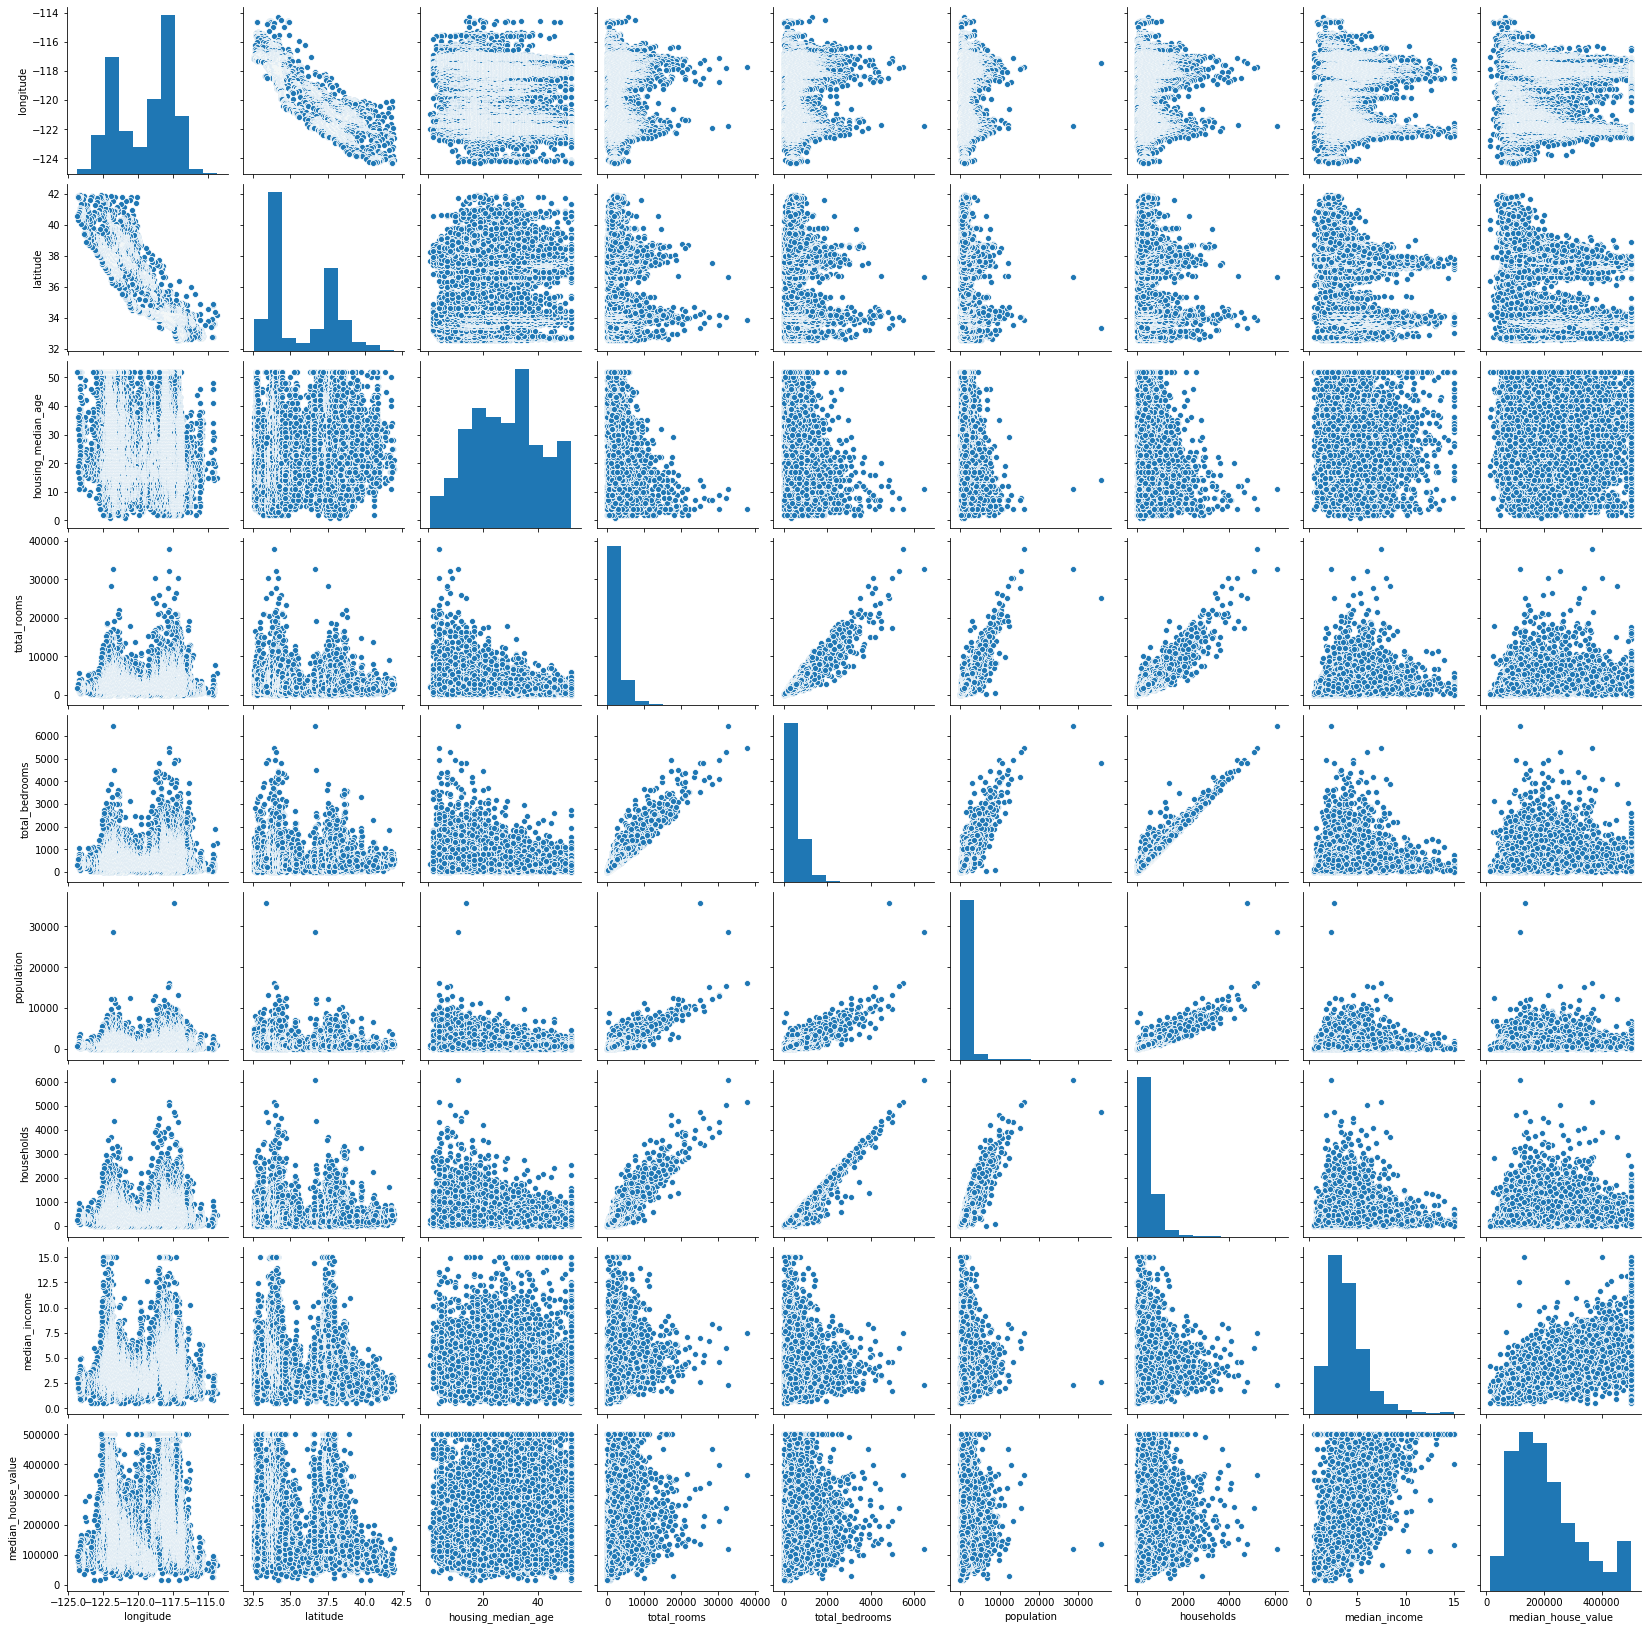

In [0]:
sns.pairplot(california_housing)

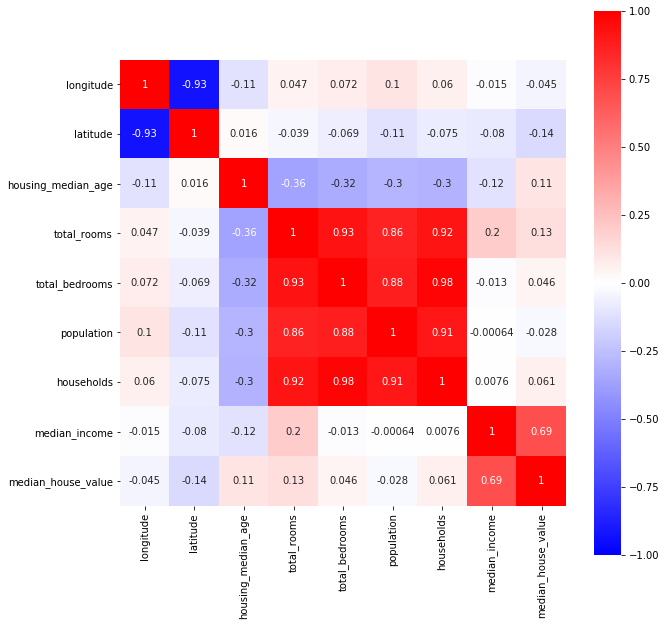

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(california_housing.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

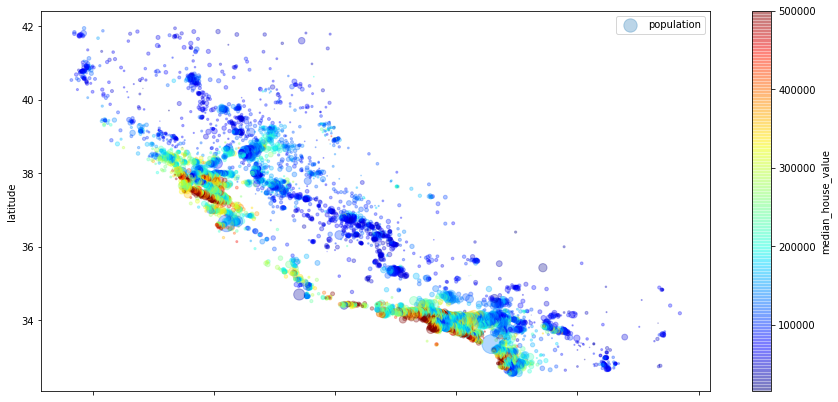

In [0]:
california_housing.plot(kind="scatter", x="longitude", y="latitude", 
                        alpha=0.3, s=california_housing["population"]/100, 
                        label="population", c="median_house_value", 
                        cmap=plt.get_cmap("jet"), colorbar=True, 
                        figsize=(15,7)) 
plt.legend()

The boxplot is one of the most important analysis we can make of our data, specially to identify outliers.

It is defined by 5 values:

 - median;
 - 1st quartile: 25% of the data;
 - 3rd quartile: 75% of the data;
 - Superior Limit: min{max(data): Q3 + 1.5(Q3-Q1)}
 - Inferior Limit: max{min(data): Q1 - 1.5(Q3-Q1)} 

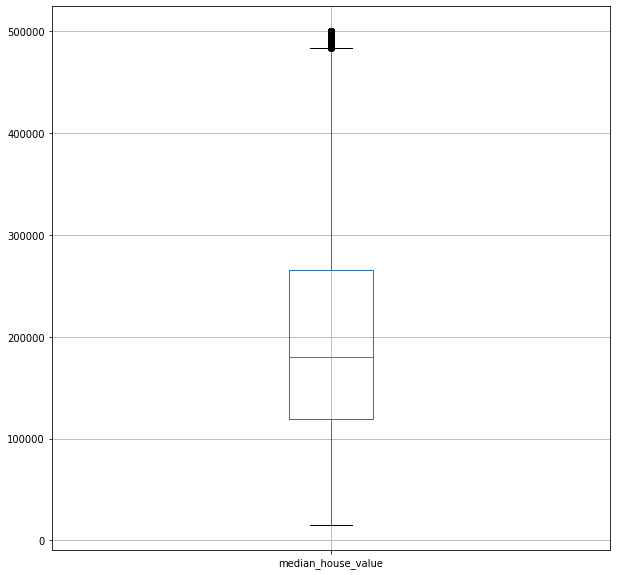

In [0]:
california_housing[['median_house_value']].boxplot(figsize=(10,10))

## Data Visualization


A density estimator is an algorithm to model the probability distribution of a dataset. For one dimensional data, we use the most common simple density estimator: the histogram. A histogram divides the data into discrete bins, counts the number of points that fall in each bin, and then visualizes the results.


- How to plot one dimensional histograms?

For example, let's start visualizing a bimodal distribution, for example the longitude.



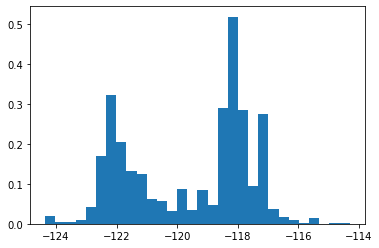

In [0]:
hist = plt.hist(california_housing['longitude'], bins=30, density=True)

The factor 'normed=True' normalizes the data, so we can see in the y-axis is the probability and not the counts.
Since we are dealing with probabilities, this distribution should sum to 1, as we can check:

In [0]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

This was a good choice of number of bins, but what do we do when this is not true?

Actually, this is one of the issues with using a regular histogram as a density estimator: the choice of bin size and location can lead to representations that have qualitatively different features. 

- Let us try different numbers of bins to see what happens...




(array([0.04136396, 0.15057417, 0.09620342, 0.2045348 , 0.00533161]),
 array([-124.35 , -122.342, -120.334, -118.326, -116.318, -114.31 ]),
 <a list of 5 Patch objects>)

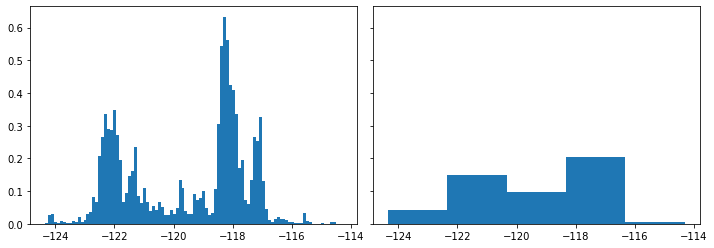

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)
ax[0].hist(california_housing['longitude'], bins=100, density=True)
ax[1].hist(california_housing['longitude'], bins=5, density=True)

On the left, the histogram makes clear that this is a bimodal (or even with more modes - undersmoothing) distribution. On the right, we see a unimodal distribution (oversmoothing). Without seeing the preceding code, you would probably not guess that these two histograms were built from the same data.

To solve this, it is always better to plot as a function of the density. We can think of a histogram as a stack of blocks, where we stack one block within each bin on top of each point in the dataset.

Let's use a standard normal curve at each point instead to represent each block:


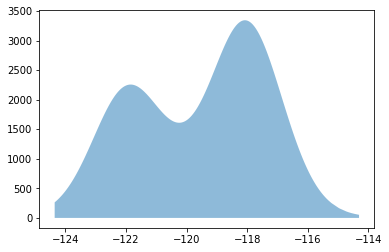

In [0]:
from scipy.stats import norm

density = sum(norm(xi).pdf(california_housing['longitude']) for xi in california_housing['longitude'])

plt.fill_between(california_housing['longitude'], density, alpha=0.5)


This last plot is an example of a kernel density estimation in one dimension: it uses a Gaussian kernel.

- The Kernel Density Estimation (KDE) is a non-parametric method to estimate the Probability Distribution Function of a given dataset.
- KDE is a data smoothing problem, where inferences about the data population are made.
- In python, the function kde is part of the packages seaborn and scikit-learn.

The free parameters of kernel density estimation are the kernel, which specifies the shape of the distribution placed at each point, and the kernel bandwidth, which controls the size of the kernel at each point.

Here we introduce the beauty of using Scikit-Learn.



(-0.02, 0.22)

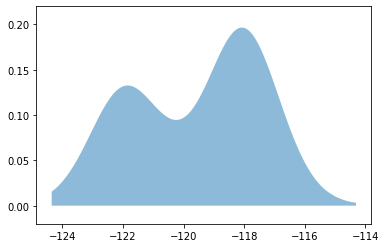

In [0]:
from sklearn.neighbors import KernelDensity
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(california_housing['longitude'][:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(california_housing['longitude'][:, None])

plt.fill_between(california_housing['longitude'], np.exp(logprob), alpha=0.5)
plt.ylim(-0.02, 0.22)

The choice of bandwidth within KDE is extremely important to finding a suitable density estimate.

- The badwidth is a smoothing parameter and the better it is defined, the better the data visualization will be.
- How do we determine the best bandwidth then?

-> Cross-Validation, where the basic idea is to construct an estimate of F(h) and then to select h to minimize this estimate.

We can use KFold or LeaveOneOut methods:
 - LeaveOneOut: LeaveOneOut (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. This cross-validation procedure does not waste much data as only one sample is removed from the training set.
 - KFold: KFold divides all the samples in k groups of samples, called folds (if k=n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using k-1 folds, and the fold left out is used for test.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

bandwidths = 10 ** np.linspace(-1, 1, 10)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=KFold())

grid.fit(california_housing['longitude'][:, None]);

grid.best_params_

{'bandwidth': 1.291549665014884}

What about 2-D distributions? What is the best way to show the distribution of the data?

Let's compare a simple scatter plot with a 2-D histogram using hexbin (the hexagonal binning routine).

- Using seaborn we can visualize the marginal distribution of the data.

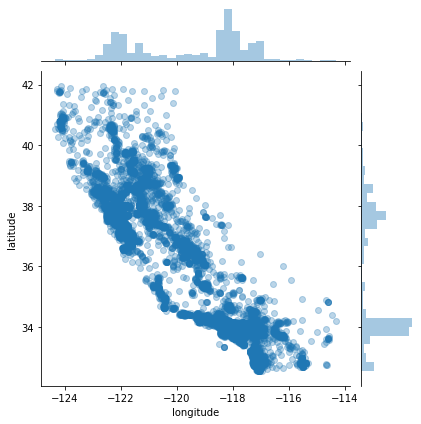

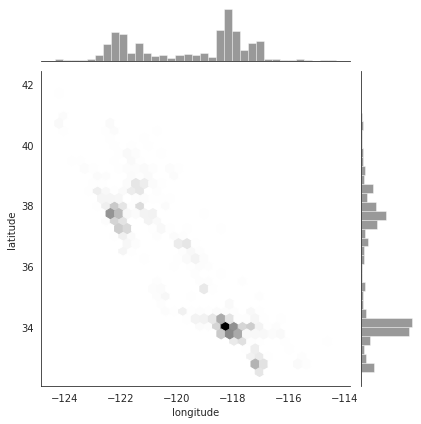

In [0]:
sns.jointplot(x=california_housing['longitude'], y=california_housing['latitude'],alpha=0.3);
with sns.axes_style("white"):
  sns.jointplot(x=california_housing['longitude'], y=california_housing['latitude'], kind="hex", color="k");


From the preivous plots, we can already see the great advantage of using a "hex" distribution in the data visualization
Instead of overlapping, the plotting window is split in several hexbins, and the number of points per hexbin is counted.
. But it can be even better... 

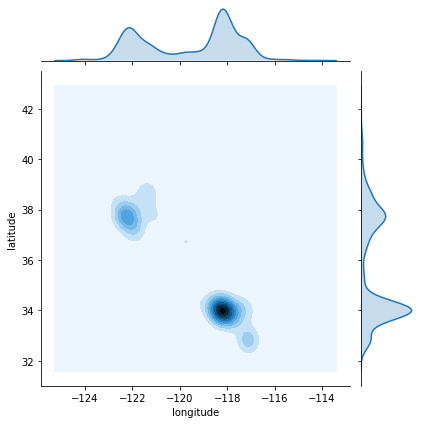

In [0]:
sns.jointplot(x=california_housing['longitude'], y=california_housing['latitude'], kind="kde");

### <font color='red'>**EXERCISES WITH S-PLUS DATA**</font>
Now it's time to play around with astronomical data. For this exercise, you will use a sample data from S-PLUS. 

1. Read splus_laplata.txt with pandas
2. Use df.info() to check the name and type of all columns
3. Use df.describe().T to check statistics of your data 
4. Use df.column.value_counts() to check how many stars, quasars and galaxies are in this data
5. Store in another variable called "gal_splus" a dataframe containing only galaxies. Check df.describe().T again, now only for galaxies.
6. What is the filter that have highest standard deviation in magnitudes?
7. Use df.column.boxplot() on the answer from Item 6. 

Now playing with distributions...

Using the galaxies dataset:

1. Retrieve two different colour distributions (1D histogram) of the data, one for the objects with u-r > 2.22 and one for u-r < 2.22. What is the comparison between the two distributions? What types of objects are more frequent in the local universe? 
2. What is the best bandwidth (h value) that describes both of the distributions?
3. Plot the colour-colour diagram u-r vs. g-i  using scatter, hexbin and kde. Is there any bimodality? If so, what is the (astronomical) explanation for it?


In [0]:
# read splus data with pandas

In [0]:
# find the statistics: describe, info...

In [0]:
# value_counts

In [0]:
# select only galaxies

In [0]:
# boxplot

In [0]:
# using the sample of galaxies, exclude objects with missing bands

In [0]:
# calculate u-r and g-i

In [0]:
# create variables to store the values greater and smaller than 2.22

In [0]:
# using cross validation find the bandwidth that maximize the data visualization (do this for only one of the above distributions)

In [0]:
# plot u-r vs g-i using seaborn to visualize the bimodality

## Cluster analysis

There are several ways to visualize different distributions present in the data.
- The main idea of  clustering is: diminish the intra-group variance and increase the variance between groups.

The most common method is the K-means. But what is this? 

- K-Means is an unsupervised learning method. K-means works iteratively by defining random centroids to clusters, trying to find the centroid that minimizes the distance of the points to the center of the defined sphere.

Let's first create a dataset with clutering regions. Scikit-learn again!



(-15, 15)

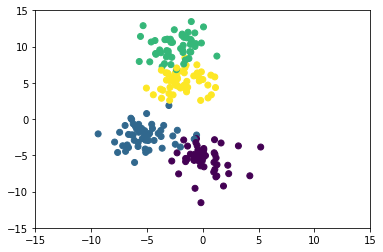

In [0]:
from sklearn.datasets import make_blobs

# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0] # shape (n_samples,n_features)
loc_cluster = data[1] # shape (n_samples) - to which cluster the point belongs.

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

Cluster Centers: [[-1.92101646  5.21673484]
 [ 0.05161133 -5.35489826]
 [-2.40167949 10.17352695]
 [-5.56465793 -2.34988939]]


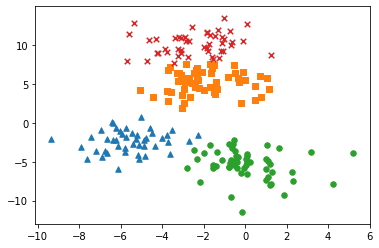

In [0]:
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=4)# fit kmeans object to data
kmeans.fit(points)# print location of clusters learned by kmeans object
print('Cluster Centers:', kmeans.cluster_centers_)# save new clusters for chart
y_km = kmeans.fit_predict(points)

plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=30, marker='^')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=30, marker='s')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=30, marker='o')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=30, marker='x')

In this case, K-Means has worked very well and retrieved all the features that we were expecting. But this is not always true.

By using this iterative manner, K-Means is a highly sensitive to outliers and initial conditions method.
 - The usual approach, therefore, is to run K-Means a lot of times in the same dataset to actually be sure that our results are reliable.

### <font color='red'>**EXERCISES WITH S-PLUS DATA**</font>
For this exercise, you will use the same sample data from S-PLUS as before. 

1. Plot the same colour-colour diagram (u-r vs. g-i) as before, but now try to identify the different distributions using the K-Means method.
  

In [0]:
# read the S-PLUS data here:

In [0]:
# select only galaxies:

In [0]:
# exclude the objects with missing values:

In [0]:
# calculate u-r and g-i:

In [0]:
# run KMeans in the data using 2 clusters:

## Dimensionality Reduction

Dimensionality reduction is the idea of reducing the number of random variables by considering a set of principle variables. There are several methods to do this: Principal Component Analysis, Local Linear Embedding ....

Let's start with the easiest one: PCA (linear projection of the data)

PCA is a method that mainly deals with linear algebra and matrix multiplication, for this, it is considered a 'linear' method. The idea of PCA is, by using ortogonal transformations, to find the principal components of the data ('the directions'). It will rotate the axis to find the ones that describe better the data, selecting only the components that mainly contribute to the data distribution.

This method can be powerful, but often miss important non-linear structure in the data.

Summarizing, the idea is to explain the fraction of the total variance of the data starting from an ortogonal transformation of the axis.

PCA Components: [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
PCA Variance: [0.7625315 0.0184779]


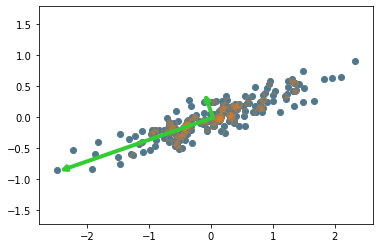

In [0]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

print('PCA Components:', pca.components_)

print('PCA Variance:', pca.explained_variance_)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=4,
                    shrinkA=0, shrinkB=0,color='limegreen')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');



original shape:    (200, 2)
transformed shape: (200, 1)


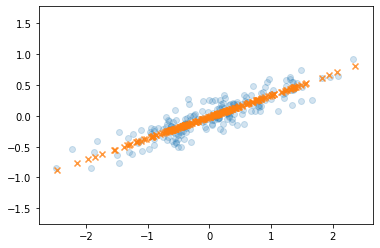

In [0]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], marker='x', alpha=0.8)
plt.axis('equal');



Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high.

Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data. Though supervised variants exist, the typical manifold learning problem is unsupervised: it learns the high-dimensional structure of the data from the data itself, without the use of predetermined classifications.

LLE: Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

The standard LLE algorithm comprises three stages:
1. Nearest Neighbors Search.
2. Weight Matrix Construction.
3. Partial Eigenvalue Decomposition. 

Modified LLE: multiple weight vectors in each neighborhood.

ISOMAP: Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points.
The Isomap algorithm comprises three stages:
1. Nearest neighbor search.
2. Shortest-path graph search.
3. Partial eigenvalue decomposition.

and so on... let's see an example of the differences between many manifold methods.

LLE: 0.18 sec
LTSA: 0.28 sec
Hessian LLE: 0.39 sec
Modified LLE: 0.3 sec
Isomap: 0.6 sec
MDS: 2.5 sec
SE: 0.16 sec
t-SNE: 8.1 sec


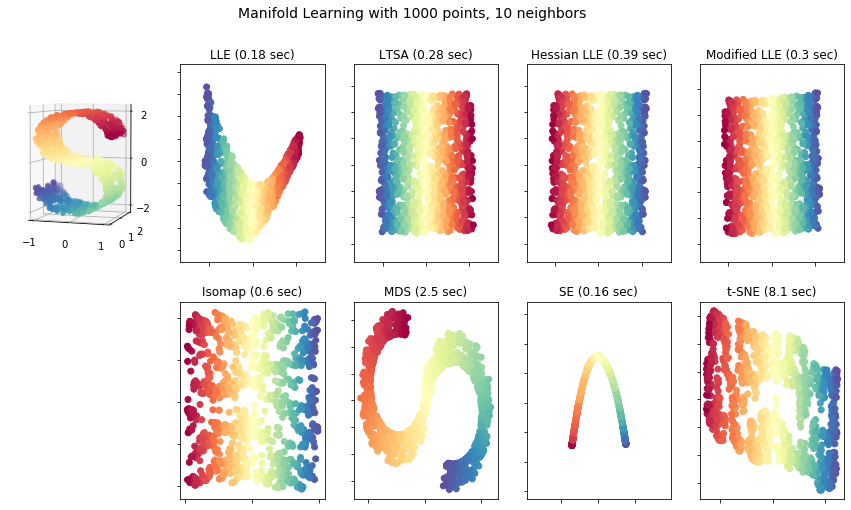

In [0]:
from collections import OrderedDict
from functools import partial
from time import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()


### <font color='red'>**EXERCISES WITH S-PLUS DATA**</font>
For this exercise, you will use the same sample data from S-PLUS as before. 

1. Plot the colour-magnitude diagram of u-r vs. r and apply the PCA method. Do the same for other colours that you may find interesting.
2. Do the same thing using the LLE method. Compare the results with the PCA.
  

In [0]:
# read the table, exclude objects with missing values (you don't need to extract only galaxies now)

In [0]:
# you will need to standize your features onto unit scale (mean = 0 and variance = 1), since it is not created from normal distributions. 
#For this:
from sklearn.preprocessing import StandardScaler
features = ['color','r']
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [0]:
#run pca with n_components = 1

In [0]:
#run the standard LLE with n_component = 1, n_neighbors = 10, eigen_solver='auto' 

### <font color='blue'>**RECOMMENDED BIBLIOGRAPHY**</font>

1. Manifold in Scikit-Learn: https://scikit-learn.org/stable/modules/manifold.html.
2. PCA Analysis: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c.
3. PCA Theory: Lever et al. 2017 (Nature Methods).
4. K-Means Clustering: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1.
5. Other methods of clustering: https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68.
6. Python Statistics and Data Visualization: https://realpython.com/python-statistics/.
7. Cross-Validation: https://scikit-learn.org/stable/modules/cross_validation.html.
7. Prof. Laerte (:  

This is the end of my class! Thank you (:

---------------------------------------------------------------------

# Classification with Machine Learning

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import datasets

## Reading data

The data set we are going to use in this part of the tutorial consists of **50 samples from each of three species of Iris** (*Iris setosa*, *Iris virginica* and *Iris versicolor*). **Four features** were measured from each sample: the length and the width of the sepals and petals, in centimeters. 



<img src="https://thegoodpython.com/assets/images/iris-species.png" width=900/>

Let's store the useful information in a dataframe called **iris**. The real classification for each row (i.e., for each flower) will be stored into another variable called **target**:

In [0]:
target = pd.DataFrame(datasets.load_iris().target, columns=['target'])
iris = pd.DataFrame(datasets.load_iris().data, columns=datasets.load_iris().feature_names) 

## Pre-processing data

This is the most important part when working with Machine Learning. It is not as simple as a cake recipe, but these few steps will already give you a better understanding of your data. Decisions must be taken from there, case by case. 


<font color='red'>**>> TRY YOURSELF:**</font>

---

STEP 1: Check if your dataset is ok 
- [ ] Check names of the columns -> `list(df)` or `print(df.columns)`
- [ ] Check type of each column  -> `df.dtypes`
 ...or simply do `df.info()`


---


STEP 2: Check statistics
- [ ] Statistical summary -> `df.describe().T` 
- [ ] Check outliers -> `df.column.boxplot()` 

(+ other analyses based on data visualization )

---

STEP 3: Check missing values
- [ ] Check presence of NaNs -> `df.isna().sum()`
- [ ] Drop NaNs, if necessary (not always the best way to deal with it!) -> `df = df.dropna()`


---

STEP 4: Check correlations
- [ ] Correlation matrix -> `df.corr()`

---



## Cross-validation

In classification problems, we validate models through cross-validation. 
Here we are going to sample our data into training and validation sets in a very simple way called **Holdout method**, instead of K-Fold. 

In Holdout method we just sample X% of the data as training set and another (100-X)% as validation set. There is no rule for choosing X, but we usually use X=70 or X=75. 
However, we highly recommend that you use K-Fold in your works, instead of Holdout. 

**Note:** The iris dataset is very small, thus I will not consider a validation set and I will simply work with only a training and a testing set. 

<img src="https://raw.githubusercontent.com/marixko/classification_regression/master/holdout1.png"  width="500"/>

In [0]:
X_train,X_test,y_train,y_test=train_test_split(iris,target,test_size=0.3,random_state=42)
print(len(X_test), len(X_train))

45 105


In [0]:
# Frequencies of each flower in our dataset
target.target.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

In [0]:
# Frequencies of each flower in our test set
y_test.target.value_counts(normalize=True)

0    0.422222
2    0.288889
1    0.288889
Name: target, dtype: float64

In [0]:
# Frequencies of each flower in our training set
y_train.target.value_counts(normalize=True)

2    0.352381
1    0.352381
0    0.295238
Name: target, dtype: float64

Did you notice that we are sampling a different distribution from our initial dataset? We have more class 0 than others in our testing set. Also, in our training set, we have less of class 0. 

In order to maintain the initial proportion, we do a **stratified sampling**:


In [0]:
X_train,X_test,y_train,y_test=train_test_split(iris,target,test_size=0.3,random_state=42, stratify=target)
print(len(X_test), len(X_train))

45 105


<font color='red'>**>> TRY YOURSELF:**</font>

- [x] Split your data by classes frequences with stratified sampling 
- [ ] Check again the frequencies of classes 0, 1 and 2 from our training and testing sets

## Training and Validating models

There are several classification methods you can use, each of them has its own pros and cons, depending on your science goals and on your dataset. 

Regardless of the algorithm you choose, keep in mind that you have to:

- Check the algorithm assumptions of your data (e.g. linearity) 
- Check what each parameter of your model (also known as hyperparameter) does. This is important for you to be able to refine your model fitting
- Check which features might be useful for your problem

What you can validate through cross-validation:

- Which algorithm to use
- Which features to use
- Which hyperparameters to use

We will give you an example using Decision Trees and Random Forest.

### Decision Trees

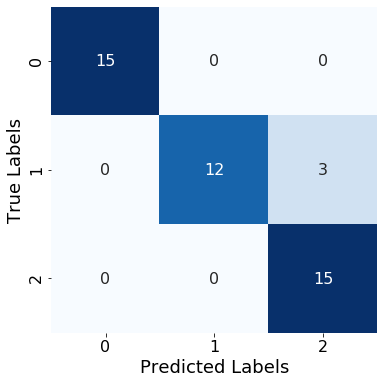

In [0]:
clf_DT = DecisionTreeClassifier(random_state=42)
clf_DT.fit(X_train, y_train.target.ravel())

y_pred = clf_DT.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,6))
fig = sns.heatmap(matrix, annot=True, square=True, cbar=False, cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted Labels', size=18)
plt.ylabel('True Labels',size=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show() 


In [0]:
print(metrics.classification_report
      (y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     1.0000    0.8000    0.8889        15
           2     0.8333    1.0000    0.9091        15

    accuracy                         0.9333        45
   macro avg     0.9444    0.9333    0.9327        45
weighted avg     0.9444    0.9333    0.9327        45



### Random Forest

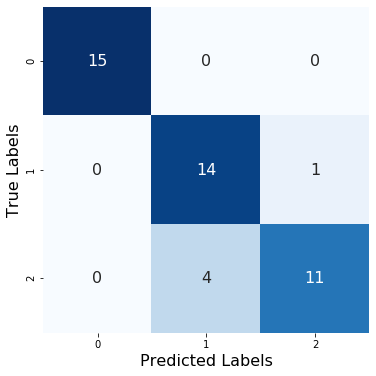

In [0]:
clf_RF = RandomForestClassifier(random_state=42)
clf_RF.fit(X_train, y_train.target.ravel())

y_pred = clf_RF.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
fig = sns.heatmap(matrix, annot=True, square=True, cbar=False, cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted Labels', size=18)
plt.ylabel('True Labels',size=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show() 




In [0]:
print(metrics.classification_report
      (y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.7778    0.9333    0.8485        15
           2     0.9167    0.7333    0.8148        15

    accuracy                         0.8889        45
   macro avg     0.8981    0.8889    0.8878        45
weighted avg     0.8981    0.8889    0.8878        45



## Metrics

Let's recall the definition of each metric shown in `classification_report()`

First, for a classification problem we can define <font color='green'>True Positives</font>, <font color='red'>False Positives</font>, <font color='red'>False Negatives</font> and <font color='green'>True Negatives</font>. To understand how we define these values, **let's suppose we are interested in the CLASS 0 objects**. Then:

- <font color='green'>True Positives</font>: is the number of CLASS 0 objects that were CORRECTLY classified as CLASS 0 
- <font color='red'>False Positives</font>: is the number of CLASS 1 or CLASS 2 objects that were INCORRECTLY classified as CLASS 0 
- <font color='red'>False Negatives</font>: is the number of CLASS 0 objects that were INCORRECTLY classified as CLASS 1 or CLASS 2
- <font color='green'>True Negatives</font>: is the number of CLASS 1 or CLASS 2 objects that were CORRECTLY or INCORRECTLY classified as CLASS 1 or CLASS2 (for simplicity, we can gather all these cases altogether)


We can see below how the confusion matrix looks like:


<img src = "https://raw.githubusercontent.com/marixko/classification_regression/master/confusion_matrix.png" width=500/>

### Precision/Purity of CLASS 0


> Precision $
\equiv \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$ is the fraction of correct classifications among objects classified as CLASS 0



### Recall/Completeness of CLASS 0

> Recall $
\equiv \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$ is the fraction of CLASS 0 objects that we are classifying correctly



### F-score 

> $F = {2}\Big(P_i^{-1}+R_i^{-1}\Big)^{-1}  = 2 \times \frac{P_iR_i}{P_i+R_i}\$ is the harmonic mean of Precision and Recall:


### Accuracy

> Accuracy $\equiv \frac{\text{True Positives} + \text{True Negatives}}{\text{Total}}$ is the fraction of correct classifications, in overall

#Regression with Machine Learning

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [0]:
# We can use this other dataset to make further tests
# california_housing_test = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")


## Pre-processing data

This is the most important part when working with Machine Learning. It is not as simple as a cake recipe, but these few steps will already give you a better understanding of your data. Decisions must be taken from there, case by case. 


<font color='red'>**>> TRY YOURSELF:**</font>

---

STEP 1: Check if your dataset is ok 
- [x] Check names of the columns -> `list(df)` or `print(df.columns)`
- [x] Check type of each column  -> `df.dtypes`
 ...or simply do `df.info()`


---


STEP 2: Check statistics
- [x] Statistical summary -> `df.describe().T` 
- [x] Check outliers -> `df.column.boxplot()` 

(+ other analyses based on data visualization )

---

STEP 3: Check missing values
- [x] Check presence of NaNs -> `df.isna().sum()`
- [x] Drop NaNs, if necessary (not always the best way to deal with it!) -> `df = df.dropna()`


---

STEP 4: Check correlations
- [x] Correlation matrix -> `df.corr()`

---



<font color='red'>**>> TO THINK ABOUT:**</font>

1) What variable do we want to predict? (also called as target or dependent variable)

2) In your judgement -- based on the plots -- what would be the most useful features (or independent variables) to predict the value you are interested in?

3) What might be the most important independent variable(s) that explain your target? Why?








## Training and Validating Models

First of all, let's save all features we are going to use to train our algorithm in a variable called **data** and the corresponding price values in a variable called **target**.


In [0]:
target = california_housing['median_house_value']

In [0]:
data = california_housing.drop('median_house_value', axis=1)

We could again sample our data into training and validation sets using **Holdout method**:



In [0]:
X_train,X_vali,y_train,y_vali=train_test_split(data,target,test_size=0.3,random_state=42)
print(len(X_vali), len(X_train))

5100 11900


But here we also show how to sample your data using K-Fold method with (n = 4) folds. 

In [0]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=4)
# for train_index, test_index in kf.split(data):
#   print("TRAIN:", train_index, "TEST:", test_index)
#   X_train, X_test = data.loc[train_index], data.loc[test_index]
#   y_train, y_test = target.loc[train_index], target.loc[test_index]

TRAIN: [ 4250  4251  4252 ... 16997 16998 16999] TEST: [   0    1    2 ... 4247 4248 4249]
TRAIN: [    0     1     2 ... 16997 16998 16999] TEST: [4250 4251 4252 ... 8497 8498 8499]
TRAIN: [    0     1     2 ... 16997 16998 16999] TEST: [ 8500  8501  8502 ... 12747 12748 12749]
TRAIN: [    0     1     2 ... 12747 12748 12749] TEST: [12750 12751 12752 ... 16997 16998 16999]


## Training Models and Validation


### Linear Regression with Ordinary Least Squares


The class `LinearRegression()` from sklearn implements the Ordinary Least Squares to estimate the parameters of a linear regression. This method minimizes the residual sum of squares:

$RSS(\beta) = \sum_{i=1}^{N}(y_i-\hat{y}_i)$, 

where y are the observables of the dependent variable (or "true values") and $\hat{y}_i = {\beta_0+\beta_1x_1+\beta_2x_2+...}$ refers to our linear model.


linear regression train score: 0.6363553835354722
linear regression test score: 0.6502334761951298
ridge regression train score low alpha: 0.6363553835347661
ridge regression test score low alpha: 0.6502334678222017
ridge regression train score high alpha: 0.6362891139358
ridge regression test score high alpha: 0.6500865823859081


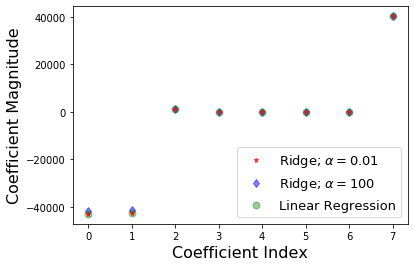

In [0]:
model_LR = LinearRegression().fit(X_train, y_train) #fitting model
y_LR = model_LR.predict(X_vali) #predicting

plt.close()
plt.figure(figsize=(10,10))
plt.scatter(y_vali, y_LR, alpha=0.5)
plt.plot([0,700000], [0,700000], color="red")
plt.ylabel('Prediction')
plt.xlabel('True')

If we are interested in acquiring the best model that fits our data, the best way to do model validation is NOT  through cross-validation, but through $R^2$ and/or residual analysis! When using cross-validation, we are focused in getting the best prediction accuracy. Validating in different ways, may lead to different models (i.e., parameters may not be the same!)

In [0]:
print('R-squared:',model_LR.score(X_train,y_train))
print('Mean Squared Error:', mean_squared_error(y_vali,y_LR))

NameError: ignored

<font color='red'>**>> TRY YOURSELF:**</font>
  
- [ ] Use the log of the house prices. How does it change your results?
 

### Linear Regression with Stochastic Gradient Descent 

Instead of minimizing the residual sum of squares, Stochastic Gradient Descent will minimize the regularized training error given by:

$ E(w,b) = \frac{1}{n} \sum_{i=1}^{N} L(y_i, \hat{y_i})+ \alpha R(w) $,

where L is a loss function, R is a regularization term that penalizes model complexity as a function of model parameters w, $\alpha$ is a non-negative hyperparameter and $\hat{y}_i = {\beta_0+\beta_1x_1+\beta_2x_2+...}$ refers to our linear model.

Choices for L: 

    * Hinge: (soft-margin) Support Vector Machines.
    * Log: Logistic Regression.
    * Least-Squares: Ridge Regression.
    * Epsilon-Insensitive: (soft-margin) Support Vector Regression.

Popular choices for R:

    * L2 norm: 
$ R(w) = \frac{1}{2} \sum_{i=1}^n w_i^2 $ 

    * L1 norm:
$ R(w) = \sum_{i=1}^n |w_i| $     

    * Elastic Net:
$ R(w) = \frac{\rho}{2} \sum_{i=1}^n w_i^2 + (1-\rho) \sum_{i=1}^n |w_i|  $ 

**IMPORTANT:** SGD is highly sensitive to feature scaling. It is recommended that you scale your data first. 

In [0]:
#Scaling your data with standardized normalization (mean 0 and variance 1)
scaler = StandardScaler()
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
X_vali_scaled = scaler.transform(X_vali)

In [0]:
model_SGD = SGDRegressor(loss="squared_loss", penalty="l2", max_iter=1000, random_state=42, eta0=0.00001, verbose=1)
model_SGD.fit(X_train_scaled, y_train)

In [0]:
y_SGD = model_SGD.predict(X_vali_scaled)

In [0]:
plt.close()
plt.figure(figsize=(10,10))
plt.scatter(y_vali, y_SGD, alpha=0.5)
plt.plot([0,600000], [0,600000], color="red")
plt.ylabel('Prediction')
plt.xlabel('True')

In [0]:
print('R-squared:',model_SGD.score(X_train_scaled,y_train))
print('Mean Squared Error:', mean_squared_error(y_vali,y_SGD))

# Deep Learning

## Introduction to Keras

Keras (https://keras.io/) is a Application Programming Interface (API) which aims to facilitate the interaction between the user and a low-level machine learning language, like TensorFlow (https://www.tensorflow.org/).

It was created and is maintained by Francois Chollet who is also the author of the excellent book "Deep Learning with Python".


### How does deep-learning work?

Deep-learning (and machine learning in general) is based on the assumption that there is a relation between the different variables of the problem you are trying to solve.

<img src="Extra/TrainLoop.png" style="width: 500px;"/>

***
To train a model, we need three datasets:
* A training dataset: So the model can learn the relation between the input and output;
* A validation dataset: So we can have an independent estimate of the performance of the model during the training;
* A testing dataset: To make a final evaluation of the performance of our model

### Regression with Keras (Multi-Layer Perceptron)

#### Loading and defining the datasets

For the regression part of the hands-on, we will use the (already seen) California housing dataset.

This dataset contains 20000 rows in total, with 9 columns each. The features are:
* Latitude;
* Longitude;
* Housing median age;
* Total rooms;
* Total bedrooms;
* Population;
* Households;
* Median income;
* Median house value.

For this exercise, we will use the first 8 features to predict the __median house value__ on the testing dataset.

Lets start by loading the data with the Pandas package.

In [0]:
# Importing Pandas:
import pandas as pd

# Importing the training dataset:
Train_Data = pd.read_csv('Data/california_housing_train.csv')

# And the testing dataset:
Test_Sample = pd.read_csv('Data/california_housing_test.csv')

As we just saw, we need to define a __validation dataset__ before training our model. This can be easily done with sklearn's 'train_test_split' function:

In [0]:
# Import the 'train_test_split' function
from sklearn.model_selection import train_test_split

# We use this function like this:
Train_Sample, Validation_Sample = train_test_split(Train_Data, train_size=0.8, random_state=1882)

In [0]:
# Lets check the size of each sample:
print('Training sample: %s rows'%(len(Train_Sample)))
print('Validation sample: %s rows' %(len(Validation_Sample)))
print('Test sample: %s rows'       %(len(Test_Sample)))

***
<font size="3">
When working with a ML problem, we should always check the distribution of the input variables. In this example we will check how the 8 features are distributed in the training, validation, and testing samples.
</font>

In [0]:
# The features of our data are:
Features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

# The target of our regression is:
Target   = ['median_house_value']

We can check the distribution of features of each dataset using histograms made with Matplotlib:

In [0]:
def sample_histograms(Train, Validation, Test, Features, Target):
  import matplotlib.pyplot as plt
  import numpy as np
  
  fig, ax = plt.subplots(figsize=(12,10))
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  plt.style.use('default')
  plt_idx = 1
  for feature in (Features + Target):
      plt.subplot(3, 3, plt_idx)

      Feature_min = min(np.min(Train[feature]), np.min(Validation[feature]), np.min(Test[feature]))
      Feature_max = max(np.max(Train[feature]), np.max(Validation[feature]), np.min(Test[feature]))

      plt.hist(Train[feature], lw=2, range=(Feature_min, Feature_max), bins=20, histtype='step', label='Training sample')
      plt.hist(Validation[feature], lw=2, range=(Feature_min, Feature_max), bins=20, histtype='step', label='Validation sample')
      plt.hist(Test[feature], lw=2, range=(Feature_min, Feature_max), bins=20, histtype='step', label='Testing sample')

      plt.yscale('log')

      plt.xlabel(feature, size=12)

      plt.grid(lw=.5)
      plt_idx = plt_idx+1

      if plt_idx == 4:
        plt.legend(loc='center', bbox_to_anchor=(1.55, 0.845), fontsize=12)

  fig.tight_layout()
  plt.show()

In [0]:
sample_histograms(Train_Sample, Validation_Sample, Test_Sample, Features, Target)

#### Pre-processing data

As we can see from the histograms, each feature spans a different range of values:

*   Longitude has negative values;
*   Population is in the order of tens of thousands
*   Median house value can reach hundreds of thousands

We need to standardize our dataset before presenting it to the model in order to facilitate the training (and convergence).

To do this, we use sklearn's StandardScaler function.
***
The StandardScaler function subtracts the mean $\mu$ of each column and divides by its stardard deviation $\sigma$, so that all columns have a mean of zero and stardard deviation of unity. Mathematically, it is described as:
\begin{equation}
X' = \frac{(X - \mu)}{\sigma},
\end{equation}
where $X'$ is the new column and $X$ is the old column. This process occurs inplace, so the new column will replace the old one.

In [0]:
from sklearn.preprocessing import StandardScaler

# Create our scaling function with default values:
Scaler_X = StandardScaler()
Scaler_Y = StandardScaler()

# Scaling our training data:
Scaled_Train_X = Scaler_X.fit_transform(Train_Sample[Features])
Scaled_Train_Y = Scaler_Y.fit_transform(Train_Sample[Target])

# Scaling our validation data:
Scaled_Validation_X = Scaler_X.transform(Validation_Sample[Features])
Scaled_Validation_Y = Scaler_Y.transform(Validation_Sample[Target])

# Now we use the values obtained by the fit on the training data to scale our testing data:
Scaled_Test_X = Scaler_X.transform(Test_Sample[Features])
Scaled_Test_Y = Scaler_Y.transform(Test_Sample[Target])

Now we can finally start creating our model!
***

In [0]:
#### Creating a deep-learning model

The process of creating a model with Keras is really simple, it is almost as if we were playing with Legos.

<img src="Extra/KerasLego.png" style="width: 500px;"/>

First, we need to import TensorFlow v2 (which includes Keras):

In [0]:
import tensorflow as tf

Then we define the method we want to use to create our network. The options are:
1. Sequential API: Allows to create the network layer-by-layer. It's the easiest way to create a neural network, but does not allow the creation of shared layers or networks with multiple inputs and/or outputs.
2. Functional API: A little more complex than the Sequential API, but still easy to use. Offers the capability of creating networks with branches and multiple inputs and/or outputs.
3. Model Subclassing API: Way more dificult to use, but allows the creation of fully customizable and complex architectures, including custom layers and different ways to treat the data.
***
For this hands-on, we will use the Sequential method.

We start defining our network by selecting the method we will use, using ```model = Sequential()``` in our case. Then we add layers the way we want using the ```model.add(...)``` function and the final step is to compile the model using ```model.compile(...)```.

***
***Hands-on***: Complete the model below the way you want. 
1. Add two or three Dense layers with any number of neurons between 16 and 128 with a 'relu' activation.
    * Try to use multiples of 2 neurons (16, 32, 64, 128, ...)
2. Add a Dropout layer between the Dense layers. Try a dropout rate between 0.1 and 0.3.
3. Choose the parameters to compile the model.
    * Loss: 'mean_squared_error' or 'mean_absolute_deviation' will work nicely.
    * Metrics: In case you want to monitor other information, you can define it here as a list (metrics=['mean_absolute_deviation'], for example).
    * Optimizer: How the network will optimize the weights. You can choose from 'adam', 'nadam', 'rmsprop', or 'sgd', among others.
***
***Tips***
* A Dense layer is written as ```Dense(units=n, activation='name')```.
* A Dropout layer is written as ```Dropout(rate=n)```.

In [0]:
# Defining some names to make the notation friendlier

Sequential = tf.keras.Sequential
Dense      = tf.keras.layers.Dense
Dropout    = tf.keras.layers.Dropout

def My_Model():
    # Define a Sequential model:
    model = Sequential()
    
    # Input Layer
    model.add(Dense(units=8, input_dim=8, activation='linear'))

    # Hidden Layers
    model.add(...)
    
    # Output Layer
    model.add(Dense(units=1, activation='linear'))

    # Compile model
    model.compile(loss=..., 
                  optimizer=...)

    return model

# Lets see a summary of our model:
My_Model().summary()

#### Training the model

In [0]:
# Compiling the model we just defined:
MLP_Model = My_Model()

# Fitting the model
MLP_Model_Fit = MLP_Model.fit(Scaled_Train_X, Scaled_Train_Y, 
                              validation_data=[Scaled_Validation_X, Scaled_Validation_Y],
                              epochs=100, batch_size=256, verbose=1)

When the model is trained, we can easily save it to use later with
```
MLP_Model.save('Saved_Model.h5')
```

To load it later and make prediction normally, we use the 'load_model' function:
```
Loaded_Model = tf.keras.models.load_model('Saved_Model.h5')
```

***

Now lets verify if the training process went well by analysing the loss plots.

In [0]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(7,5))

X = MLP_Model_Fit.epoch

plt.plot(X, MLP_Model_Fit.history['loss'], lw=3, label='Training')
plt.plot(X, MLP_Model_Fit.history['val_loss'], lw=3, label='Validation')

plt.legend()

plt.ylabel('Loss (MSE)')
plt.xlabel('Iterations')

plt.show()

#### Making predictions

Making predictions are as simple as calling a function:

In [0]:
# Making predictions for the test set:
Predictions = MLP_Model.predict(Scaled_Test_X)

# Since we used the StandardScaler function to normalize all data, we need to do the inverse transform to get the actual house values:
Predictions = Scaler_Y.inverse_transform(Predictions)

Finally, we can compare our predictions against the real house values on the test set:

In [0]:
import numpy as np
(1.48*np.median(abs((Predictions - Test_Sample[Target]) - np.median((Predictions - Test_Sample[Target]))) / (1 + Test_Sample[Target]))*100)

In [0]:
plt.subplots(figsize=(7,7))
plt.hexbin(Test_Sample[Target], Predictions, bins='log', cmap='Greys', gridsize=50)

plt.xlabel('True values')
plt.ylabel('Predicted values')

plt.plot([0,500000], [0,500000], '--', color='red')
plt.axis([0,500000, 0, 500000])

plt.show()

### Classification with Keras (Convolutional Neural Networks)

#### Loading the data

For this part of the lesson, we will use the MNIST dataset. This dataset contains 70000 rows, each one representing the image of a handwritten number.

The dataset contains:
* One label column, with the number represented in the image;
* 784 (28x28) columns with the information of the pixels in the image.

Each image has 28x28 pixels, and the value of each pixel ranges from 0 to 255.

In [0]:
# We will load the data just like we did before:
import pandas as pd

# Importing the training dataset:
Train_Data = pd.read_csv('Data/mnist_train.csv')

# And the testing dataset:
Test_Sample = pd.read_csv('Data/mnist_test.csv')

##### Seeing the image (example)

To see the images, we need to do some extra steps:

In [0]:
# Each row of these datasets represents an image. We need to convert the numbers to an image to visualize it:
import matplotlib.pyplot as plt

# First, we select the first row of our dataset and all elements after the very first one (which is the label of the image), then we reshape it to a 28x28 format:
Image = Train_Data.values[0][1:].reshape(28,28)

# Now, we just need to use Matplotlib's 'imshow' function
plt.imshow(Image)

#### Defining the datasets

In [0]:
# Just like we did in the regression part, we should now define a new validation dataset using sklearn's 'train_test_split' function:
from sklearn.model_selection import train_test_split

# We use this function like this:
Train_Sample, Validation_Sample = train_test_split(Train_Data, train_size=0.8, random_state=1882)

#### Pre-processing the data

Just like we did with the regression model, we should normalize our data.

The dataset we are using contains one column named 'label', which is the number represented in the image. We should not normalize it. Because of this we need to remove this column from our dataset.

We can do this with Pandas:

In [0]:
# Define a new variable containing only the labels:
Train_Labels = Train_Sample['label']

# Drop (remove) the label from the original dataset:
Train_Sample.drop('label', axis='columns', inplace=True)

# Repeat for the remaining datasets:
Validation_Labels = Validation_Sample['label']
Validation_Sample.drop('label', axis='columns', inplace=True)

Test_Labels = Test_Sample['label']
Test_Sample.drop('label', axis='columns', inplace=True)

***

Now, instead of using the StandardScaler function, we will use the MinMaxScaler function.
The MinMaxScaler is a little different. This function brings the values of a column to the range $[0, 1]$ by doing two steps:
- 1st step: Calculate the scale: $\text{Scale} = (\text{max} - \text{min}) / (X_\text{max} - X_\text{min})$
- 2nd step: Apply the transformation: $X' = \text{Scale} \times X + \text{min} - X_\text{min} \times \text{Scale}$
***
In our case, this is:

In [0]:
from sklearn.preprocessing import MinMaxScaler

# Create our scaling function with default values:
Scaler = MinMaxScaler()

# Scaling our training data:
Scaled_Train_X = Scaler.fit_transform(Train_Sample)

# Scaling our validation data:
Scaled_Validation_X = Scaler.transform(Validation_Sample)

# Now we use the values obtained by the fit on the training data to scale our testing data:
Scaled_Test_X = Scaler.transform(Test_Sample)

***

A Convolutional Neural Network works best with images with three dimensions (height, width and depth), but our data is composed of 1D vectors. We need to reshape the data before handling it to our model:


In [0]:
# Importing Numpy to correct the dimension of the images
import numpy as np

# For the training sample, we first create and empty list:
Training_Images = []

# Now we will loop over all rows in our dataset
for i in range(len(Scaled_Train_X)):
  # The row 'i' will be reshaped to form a 28x28 array:
  Reshaped_Data = Scaled_Train_X[i].reshape(28,28)
  # And we append the reshaped row to the list we just created:
  Training_Images.append(Reshaped_Data)

# We reshaped our 1D data into a 2D image, but CNNs use 3D images as input (height, width and depth), so we use the 'expand_dims' to turn our images into 3D vectors.
Training_Images = np.expand_dims(Training_Images, axis=3)
  
# Repeat for the validation sample:
Validation_Images = []

for i in range(len(Scaled_Validation_X)):
  Reshaped_Data = Scaled_Validation_X[i].reshape(28,28)
  Validation_Images.append(Reshaped_Data)
  
Validation_Images = np.expand_dims(Validation_Images, axis=3)
  
# And for the testing sample:
Testing_Images = []

for i in range(len(Scaled_Test_X)):
  Reshaped_Data = Scaled_Test_X[i].reshape(28,28)
  Testing_Images.append(Reshaped_Data)
  
Testing_Images = np.expand_dims(Testing_Images, axis=3)

***

The task we have at hand is considered a 'multi-class' classification because we want to classify images in numbers between 0 and 9. For this reason we need to 'one hot encode' our label vectors.

Why we need to do this 'one hot encoding'? Simple, when the neural networks sees categorical labels (from 0 to 9) it 'thinks' that 9 is the most important class, followed by 8 and so on. Due to this we transform these categorical labels into a one hot vector, like this:

***
$
\begin{bmatrix}
\textbf{Categorical label}\\ \hline
1\\ 
8\\ 
5\\ 
3\\ 
2
\end{bmatrix}
\rightarrow
\begin{bmatrix}
\mathbf{0} &\mathbf{1}  &\mathbf{2}  &\mathbf{3}  &\mathbf{4}  &\mathbf{5}  &\mathbf{6}  &\mathbf{7}  &\mathbf{8}  &\mathbf{9} \\ \hline
0 &1  &0  &0  &0  &0  &0  &0  &0  &0 \\ 
0 &0  &0  &0  &0  &0  &0  &0  &1  &0 \\ 
0 &0  &0  &0  &0  &1  &0  &0  &0  &0 \\ 
0 &0  &0  &1  &0  &0  &0  &0  &0  &0 \\ 
0 &0  &1  &0  &0  &0  &0  &0  &0  &0 
\end{bmatrix}
$
***

Now the network will not give more importance to one label over another!

In [0]:
# To do the 'one hot encoding'
import tensorflow as tf

# For the training sample
Train_Labels = tf.keras.utils.to_categorical(Train_Labels)

# For the validation sample
Validation_Labels = tf.keras.utils.to_categorical(Validation_Labels)

# For the testing sample
Test_Labels = tf.keras.utils.to_categorical(Test_Labels)

We can finally create our model, just like we did before, with a few changes in the network

#### Creating a CNN model

The main difference between a multi-layer perceptron and a convolutional neural network is the presence of convolutional layers.

The main configuration of Dense layers are the number of neurons and the activation function. For Conv2D layers, we need:
* The number of filters;
* The kernel size;
* The stride;

In [0]:
# Defining some names to make the notation friendlier

Sequential   = tf.keras.Sequential
Dense        = tf.keras.layers.Dense
Dropout      = tf.keras.layers.Dropout
Conv2D       = tf.keras.layers.Conv2D
Flatten      = tf.keras.layers.Flatten
MaxPooling2D = tf.keras.layers.MaxPooling2D

tf.keras.backend.clear_session()

def My_Model():
    # Define a Sequential model:
    model = Sequential()
    
    # Input Layer
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.20))

    # Hidden Layers
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.20))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.20))
    
    # The final part of a CNN is a group of fully-connected layers (Dense), so the networks can join all the information learned and give an output. 
    # The 'Flatten' layer is responsible for reshaping the information from the Conv2D layers (which are 3D) into the format that Dense layers use (which is 1D).
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.20))
    
    # Output Layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  metrics=['accuracy'], 
                  optimizer='nadam')

    return model

# Lets see a summary of our model:
My_Model().summary()

In [0]:
# Compiling the model we just defined:
CNN_Model = My_Model()

# Fitting the model
CNN_Model_Fit = CNN_Model.fit(Training_Images, Train_Labels,
                              validation_data=[Validation_Images, Validation_Labels],
                              epochs=3, batch_size=256, verbose=1)

#### Making predictions

In [0]:
# Making predictions for the test set:
Predictions  = CNN_Model.predict(Testing_Images)

To check if (or how much) our predictions are correct, we can use the confusion matrix:

In [0]:
# First we import the function from sklearn:
from sklearn.metrics import confusion_matrix

# Then we change our prediction vector a bit, so it is in the format that the 'confusion_matrix' function accepts:
Test_True_Labels = np.argmax(Test_Labels, axis=1)
Test_Pred_Labels = np.argmax(Predictions, axis=1)

# We calculate the confusion matrix:
Conf_Matrix = confusion_matrix(Test_True_Labels, Test_Pred_Labels)

# And we finally plot it using Seaborn:
import seaborn as sn

plt.figure(figsize=(7,7))
sn.set(font_scale=1.4)
sn.heatmap(Conf_Matrix, annot=True, fmt='', annot_kws={"size": 12}, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

### Exercices

# Exercises

1. Create and train a multi-layer perceptron model to predict photometric redshifts on S-PLUS data.
    * Evaluate the performance of your model by calculating the stardard deviation ($\sigma$), bias ($\mu$) and fraction of outliers ($\eta$) of your results.

\begin{equation}
    \delta = (\text{True values} - \text{Predicted values})
\end{equation}
\begin{equation}
    \sigma = \sqrt{\delta/N}
\end{equation}
\begin{equation}
    \mu = \overline{\delta}
\end{equation}
\begin{equation}
    \eta = \text{Fraction of objects for which} \delta \geq 0.15
\end{equation}

2. Classification Star/Galaxy with photometry